In [ ]:
"""
Tensorflow 2.x Keras 
+ Flatten layer 
+ History 
+ Dropout 
+ EarlyStopping

1차 : 1차원 : (28x28) -> 784
2차 : 2차원 : (28x28) -> Flatten 적용
"""

In [31]:
import tensorflow as tf # ver2.x
from tensorflow.keras.datasets.mnist import load_data # ver2.x dataset
from tensorflow.keras.utils import to_categorical # y변수 전처리 
from tensorflow.keras import Sequential # model 생성 
from tensorflow.keras.layers import Dense,Flatten,Dropout # layer 생성 
from tensorflow.keras.models import load_model # model load
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
# 1. x, y 공급 data 
(x_train, y_train), (x_val, y_val) = load_data()
x_train.shape # (60000, 28, 28)

(60000, 28, 28)

In [33]:
y_train.shape # (60000,)

(60000,)

In [34]:
x_train[0] # 0 ~ 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [35]:
# x변수 전처리 : 정규화 + 실수형
x_train, x_val = x_train / 255.0, x_val / 255.0

In [50]:
# y변수 전처리 : one hot encoding
print("전처리 전 :", y_train[0])
y_train = to_categorical(y_train) 
y_val = to_categorical(y_val)
print("전처리 후 :", y_train[0])
y_train.shape # (60000, 10)

전처리 전 : 5
전처리 후 : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


(60000, 10)

In [37]:
# 2. keara model 생성 
model = Sequential()

In [ ]:
# 3. model layer
'''
model.add(Dense(node수, input_shape, activation)) # hidden layer1
model.add(Dense(node수, activation)) # hidden layer1 ~ n
'''

In [38]:
# Flatten layer : (28x28) -> 784
model.add(Flatten(input_shape = (28,28))) # 2차원 -> 1차원

# hidden layer1 = [784, 128] 
model.add(Dense(128, activation='relu')) # 1층 # input_shape=(784,)

# hidden layer2 = [128, 64]
model.add(Dense(64, activation='relu')) # 2층 

# hidden layer3 = [64, 32]
model.add(Dense(32, activation='relu')) # 3층

# output layer = [32, 10]
model.add(Dense(10, activation='softmax')) # 4층 

In [39]:
# 4. model compile : 학습환경 설정 
model.compile(optimizer = 'adam',  # 최적화 알고리즘(lr 생략) 
              loss='categorical_crossentropy', # 손실 : 다항분류
              metrics=['accuracy']) # 평가 방법 

In [40]:
# 5. model training : train(60000) vs val(10000)
model_fit = model.fit(x=x_train, y=y_train, # 학습용 
                      epochs=10,
                      verbose=1,
                      validation_data=(x_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2570 - accuracy: 0.9227 - val_loss: 0.1280 - val_accuracy: 0.9583
Epoch 2/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.1034 - accuracy: 0.9686 - val_loss: 0.0927 - val_accuracy: 0.9721
Epoch 3/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0764 - accuracy: 0.9770 - val_loss: 0.1031 - val_accuracy: 0.9688
Epoch 4/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.0798 - val_accuracy: 0.9769
Epoch 5/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0834 - val_accuracy: 0.9743
Epoch 6/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0914 - val_accuracy: 0.9738
Epoch 7/10
60000/60000 [========================

In [41]:
# 6. model history
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
train_loss = model_fit.history['loss']
train_acc = model_fit.history['accuracy']
val_loss = model_fit.history['val_loss']
val_acc = model_fit.history['val_accuracy']

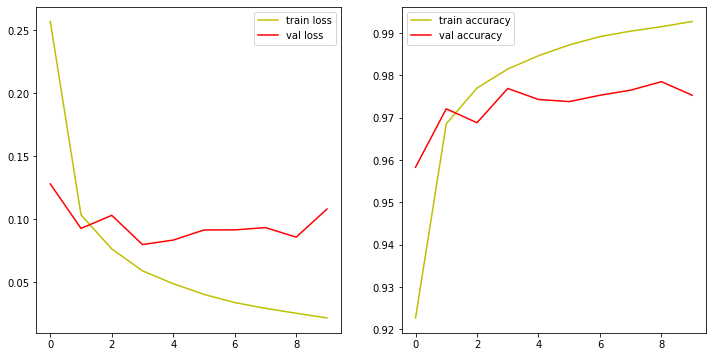

In [43]:
fig = plt.figure(figsize=(12,6))
x1 = fig.add_subplot(1,2,1)
x2 = fig.add_subplot(1,2,2)

# loss
x1.plot(train_loss, color='y', label='train loss')
x1.plot(val_loss, color='r', label='val loss')
x1.legend(loc='best')

# accuracy
x2.plot(train_acc, color='y', label='train accuracy')
x2.plot(val_acc, color='r', label='val accuracy')
x2.legend(loc='best')

In [44]:
# 7. Dropout 적용
model = Sequential()

# Flatten layer : (28x28) -> 784
model.add(Flatten(input_shape = (28,28))) # 2차원

# hidden layer1 = [784, 128] 
model.add(Dense(128, activation='relu')) # 1층 # input_shape=(784,)
Dropout(rate=0.5) # node 50% 제거

# hidden layer2 = [128, 64]
model.add(Dense(64, activation='relu')) # 2층 
Dropout(rate=0.3)

# hidden layer3 = [64, 32]
model.add(Dense(32, activation='relu')) # 3층 
Dropout(rate=0.3)

# output layer = [32, 10]
model.add(Dense(10, activation='softmax')) # 4층 

# model compile : 학습환경 설정 
model.compile(optimizer = 'adam',  # 최적화 알고리즘(lr 생략) 
              loss='categorical_crossentropy', # 손실 : 다항분류
              metrics=['accuracy']) # 평가 방법

# model training : train(60000) vs val(10000)
model_fit = model.fit(x=x_train, y=y_train, # 학습용 
                      epochs=10,
                      verbose=1,
                      validation_data=(x_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2520 - accuracy: 0.9250 - val_loss: 0.1372 - val_accuracy: 0.9588
Epoch 2/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.1103 - accuracy: 0.9656 - val_loss: 0.1111 - val_accuracy: 0.9637
Epoch 3/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0767 - accuracy: 0.9761 - val_loss: 0.0875 - val_accuracy: 0.9729
Epoch 4/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0601 - accuracy: 0.9815 - val_loss: 0.0961 - val_accuracy: 0.9715
Epoch 5/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0813 - val_accuracy: 0.9767
Epoch 6/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0432 - accuracy: 0.9857 - val_loss: 0.0934 - val_accuracy: 0.9738
Epoch 7/10
60000/60000 [=========================

In [45]:
train_loss = model_fit.history['loss']
train_acc = model_fit.history['accuracy']
val_loss = model_fit.history['val_loss']
val_acc = model_fit.history['val_accuracy']

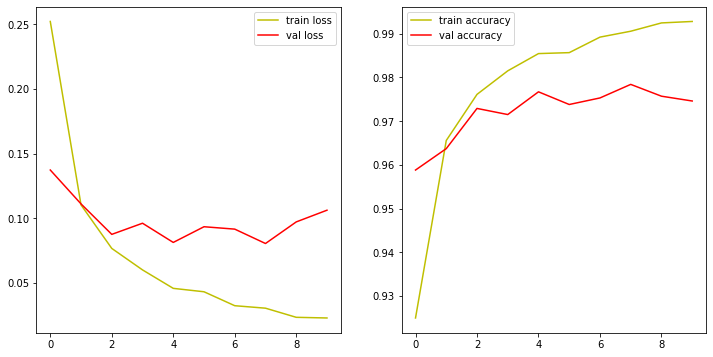

In [46]:
fig = plt.figure(figsize=(12,6))
x1 = fig.add_subplot(1,2,1)
x2 = fig.add_subplot(1,2,2)

# loss
x1.plot(train_loss, color='y', label='train loss')
x1.plot(val_loss, color='r', label='val loss')
x1.legend(loc='best')

# accuracy
x2.plot(train_acc, color='y', label='train accuracy')
x2.plot(val_acc, color='r', label='val accuracy')
x2.legend(loc='best')

In [48]:
# 8. EarlyStopping 적용
model = Sequential()

# Flatten layer : (28x28) -> 784
model.add(Flatten(input_shape = (28,28))) # 2차원

# hidden layer1 = [784, 128] 
model.add(Dense(128, activation='relu')) # 1층 # input_shape=(784,)
Dropout(rate=0.5) # node 50% 제거

# hidden layer2 = [128, 64]
model.add(Dense(64, activation='relu')) # 2층 
Dropout(rate=0.3)

# hidden layer3 = [64, 32]
model.add(Dense(32, activation='relu')) # 3층 
Dropout(rate=0.3)

# output layer = [32, 10]
model.add(Dense(10, activation='softmax')) # 4층 

# model compile : 학습환경 설정 
model.compile(optimizer = 'adam',  # 최적화 알고리즘(lr 생략) 
              loss='categorical_crossentropy', # 손실 : 다항분류
              metrics=['accuracy']) # 평가 방법

# model training : train(60000) vs val(10000)
callback = EarlyStopping(monitor='val_loss',patience=2)

model_fit = model.fit(x=x_train, y=y_train, # 학습용 
                      epochs=10,
                      verbose=1,
                      validation_data=(x_val, y_val), # 평가용 
                      callbacks=[callback]) # 조기종료
# callback : 특정 method -> 또 다른 method 호출기법

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2528 - accuracy: 0.9252 - val_loss: 0.1249 - val_accuracy: 0.9596
Epoch 2/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1053 - accuracy: 0.9679 - val_loss: 0.0987 - val_accuracy: 0.9691
Epoch 3/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0760 - accuracy: 0.9764 - val_loss: 0.0868 - val_accuracy: 0.9738
Epoch 4/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0584 - accuracy: 0.9814 - val_loss: 0.0900 - val_accuracy: 0.9733
Epoch 5/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.0850 - val_accuracy: 0.9733
Epoch 6/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0866 - val_accuracy: 0.9747
Epoch 7/10
60000/60000 [==========================